In [1]:
import numpy as np #선형대수 활용
import pandas as  pd #pandas 활용
import matplotlib.pyplot as plt
import seaborn as sns

/Users/gimsehwan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('iot_telemetry_data.csv',engine='python')

In [4]:
df

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
...,...,...,...,...,...,...,...,...,...
405179,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001
405180,1.595203e+09,b8:27:eb:bf:9d:51,0.005882,48.500000,False,0.008660,False,0.023301,22.200000
405181,1.595203e+09,1c:bf:ce:15:ec:4d,0.004540,75.699997,True,0.007181,False,0.019076,26.600000
405182,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001


In [5]:
df.replace(['00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d', 'b8:27:eb:bf:9d:51'], [1, 2, 3], inplace=True) #device이름을 간단하게 변경
df['time_stamp'] = pd.to_datetime(df['ts'],unit='s') #timestamp를 datetime 포맷으로 변경
df.drop(columns=['ts'], inplace=True)

df_1 = df[df.device == 1]
df_2 = df[df.device == 2]
df_3 = df[df.device == 3]

In [6]:
df_1
df_2
df_3

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,3,0.004956,51.0,False,0.007651,False,0.020411,22.7,2020-07-12 00:01:34.385974407
2,3,0.004976,50.9,False,0.007673,False,0.020475,22.6,2020-07-12 00:01:38.073572636
4,3,0.004967,50.9,False,0.007664,False,0.020448,22.6,2020-07-12 00:01:41.761234999
6,3,0.004976,50.9,False,0.007673,False,0.020475,22.6,2020-07-12 00:01:45.448863506
9,3,0.004970,50.9,False,0.007667,False,0.020457,22.6,2020-07-12 00:01:49.136686802
...,...,...,...,...,...,...,...,...,...
405173,3,0.005901,48.4,False,0.008681,False,0.023359,22.3,2020-07-20 00:03:22.518241405
405176,3,0.005909,48.4,False,0.008689,False,0.023382,22.3,2020-07-20 00:03:26.203541040
405177,3,0.005877,48.5,False,0.008654,False,0.023284,22.3,2020-07-20 00:03:29.889806509
405180,3,0.005882,48.5,False,0.008660,False,0.023301,22.2,2020-07-20 00:03:33.576560736


/Users/gimsehwan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


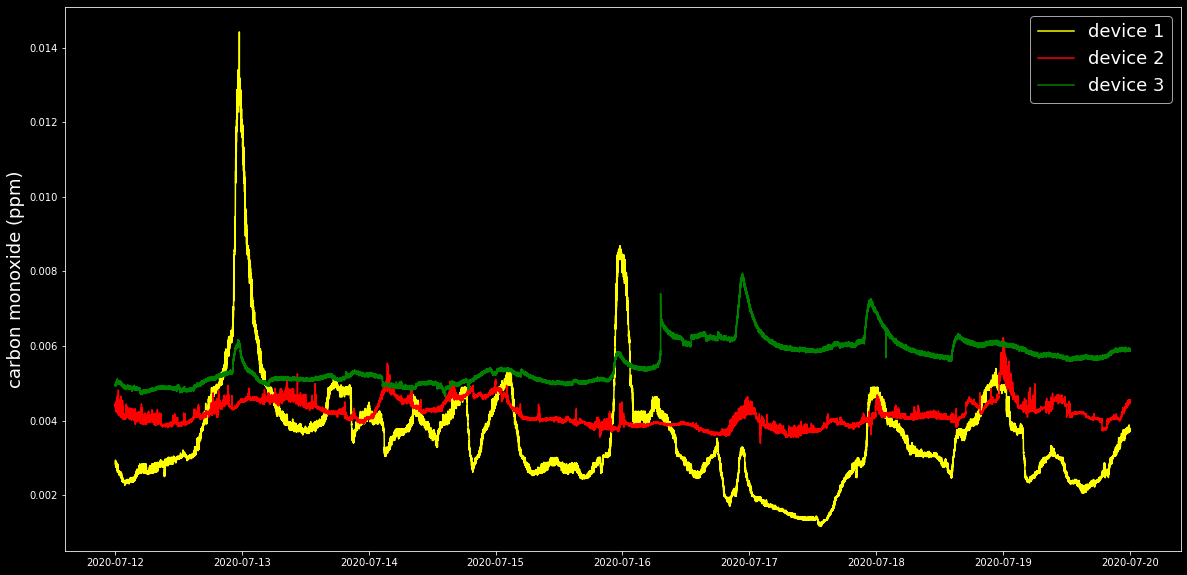

In [10]:
import matplotlib.dates as mdates

plt.style.use('dark_background')

plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.time_stamp, df_1.co, color = 'yellow', label = 'device 1')
ax2 = sns.lineplot(df_2.time_stamp, df_2.co, color = 'red', label = 'device 2')
ax3 = sns.lineplot(df_3.time_stamp, df_3.co, color = 'green', label = 'device 3')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('carbon monoxide (ppm)', fontsize = 18)
plt.xlabel('')
plt.legend(fontsize = 18)
plt.show()

/Users/gimsehwan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


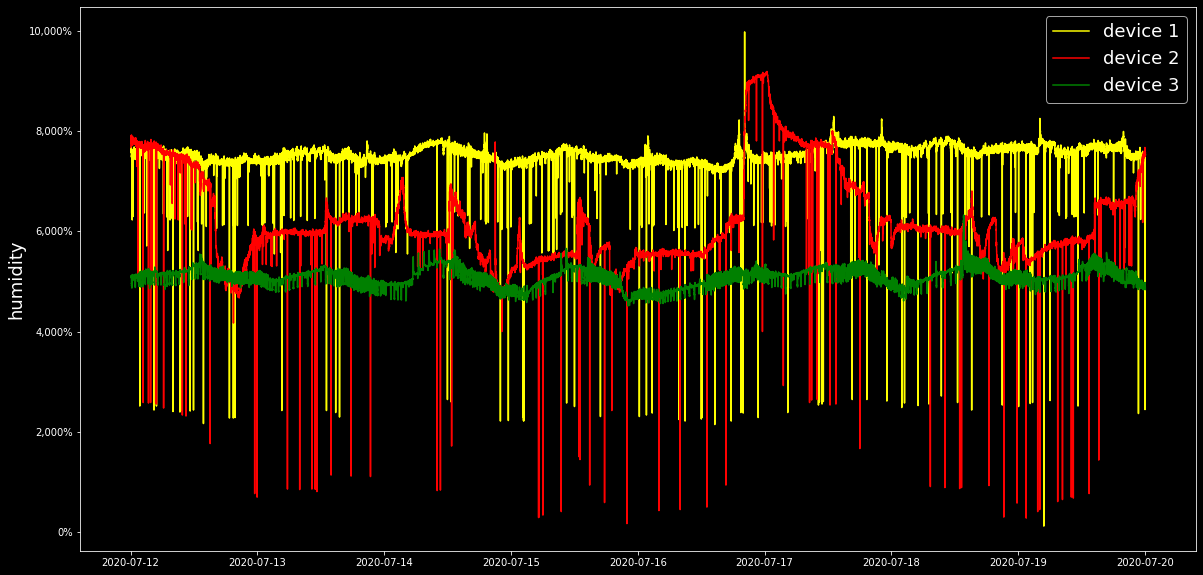

In [11]:
plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.time_stamp, df_1.humidity, color = 'yellow', label = 'device 1')
ax2 = sns.lineplot(df_2.time_stamp, df_2.humidity, color = 'red', label = 'device 2')
ax3 = sns.lineplot(df_3.time_stamp, df_3.humidity, color = 'green', label = 'device 3')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
vals = ax3.get_yticks()
ax3.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.ylabel('humidity', fontsize = 18)
plt.legend(fontsize = 18)
plt.xlabel('')
plt.show()

/Users/gimsehwan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


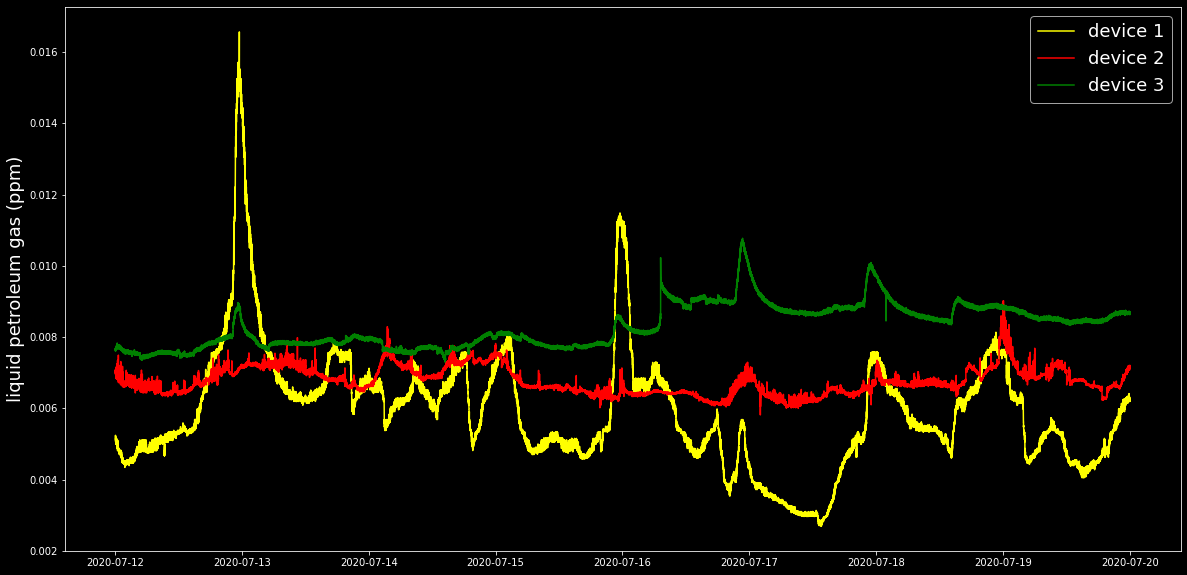

In [12]:
plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.time_stamp, df_1.lpg, color = 'yellow', label = 'device 1')
ax2 = sns.lineplot(df_2.time_stamp, df_2.lpg, color = 'red', label = 'device 2')
ax3 = sns.lineplot(df_3.time_stamp, df_3.lpg, color = 'green', label = 'device 3')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('liquid petroleum gas (ppm)', fontsize = 18)
plt.xlabel('')
plt.legend(fontsize = 18)
plt.show()


/Users/gimsehwan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


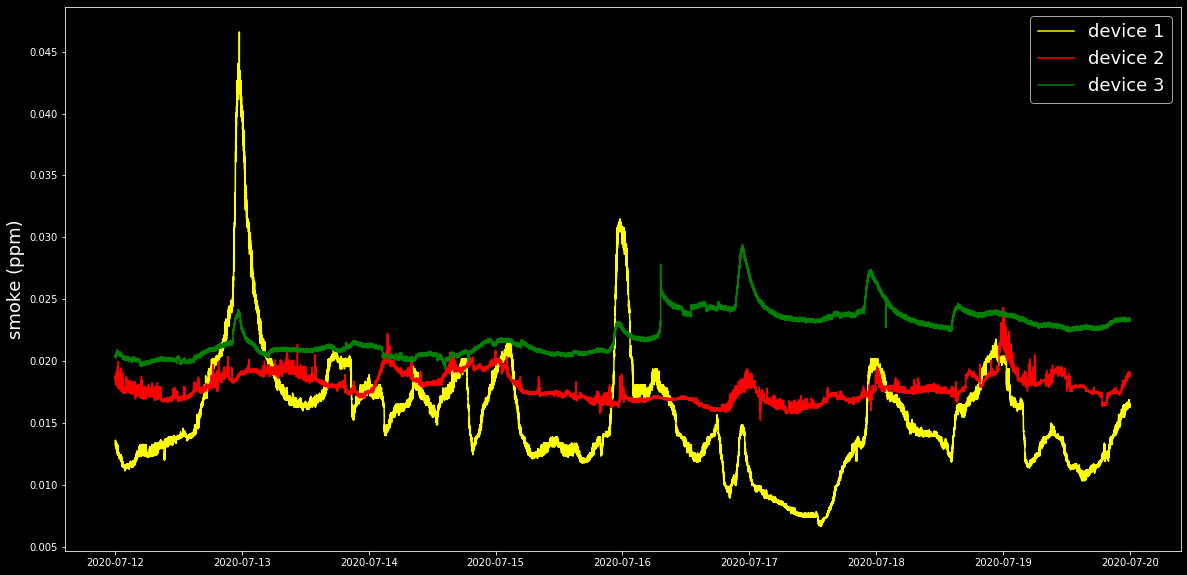

In [13]:
plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.time_stamp, df_1.smoke, color = 'yellow', label = 'device 1')
ax2 = sns.lineplot(df_2.time_stamp, df_2.smoke, color = 'red', label = 'device 2')
ax3 = sns.lineplot(df_3.time_stamp, df_3.smoke, color = 'green', label = 'device 3')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('smoke (ppm)', fontsize = 18)
plt.xlabel('')
plt.legend(fontsize = 18)
plt.show()

/Users/gimsehwan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


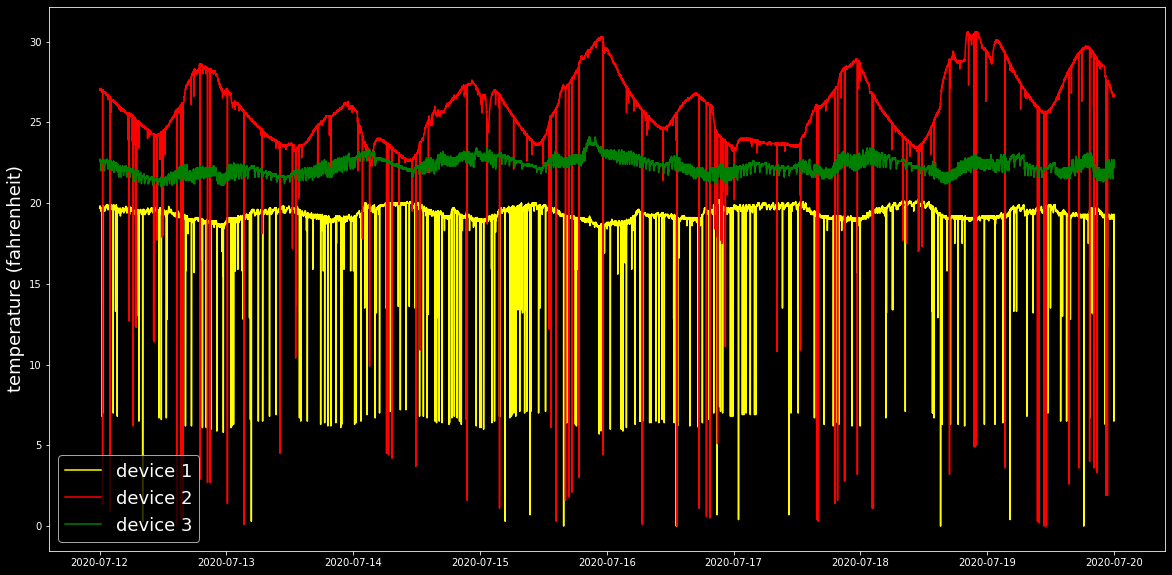

In [14]:
plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.time_stamp, df_1.temp, color = 'yellow', label = 'device 1')
ax2 = sns.lineplot(df_2.time_stamp, df_2.temp, color = 'red', label = 'device 2')
ax3 = sns.lineplot(df_3.time_stamp, df_3.temp, color = 'green', label = 'device 3')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('temperature (fahrenheit)', fontsize = 18)
plt.xlabel('')
plt.legend(fontsize = 18)
plt.show()